<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://drive.google.com/file/d/1L-xSPPZBjWZghqqtNSPCvQuDIkYnuDGL/view?usp=sharing
#https://drive.google.com/open?id=1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0
#id del archivo: 1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0
FILEID = "1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-04-22 22:04:23--  https://docs.google.com/uc?export=download&confirm=&id=1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0
Resolving docs.google.com (docs.google.com)... 74.125.124.101, 74.125.124.138, 74.125.124.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-6k-docs.googleusercontent.com/docs/securesc/r0jt4ukda5otn4jaevejnjrghneijb36/4pbku5efmvqm4ip7ln7q3ivmq01msur3/1587593025000/11146100322577758036/11394504172963939915Z/1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0?e=download [following]
--2020-04-22 22:04:23--  https://doc-0s-6k-docs.googleusercontent.com/docs/securesc/r0jt4ukda5otn4jaevejnjrghneijb36/4pbku5efmvqm4ip7ln7q3ivmq01msur3/1587593025000/11146100322577758036/11394504172963939915Z/1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0?e=download
Resolving doc-0s-6k-docs.googleusercontent.com (doc-0s-6k-docs.googleusercontent.com)... 108.177.112.132, 2607:f8b0:4001:c12::84
Connecting to

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

In [0]:
import time
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, SpectralClustering
from main_functions import PRI,MiniBatchPRI,spectralClustering
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin

**Punto Fijo**

el tiempo requerido fue:0.9408011436462402sg


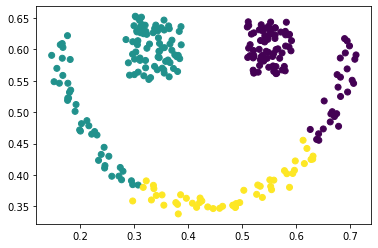

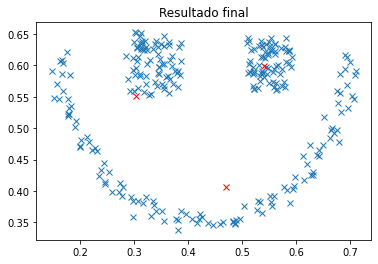

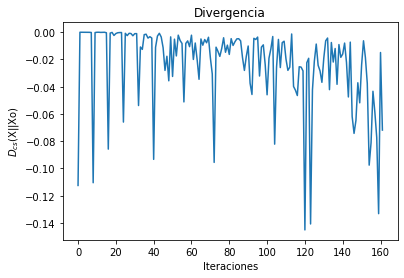

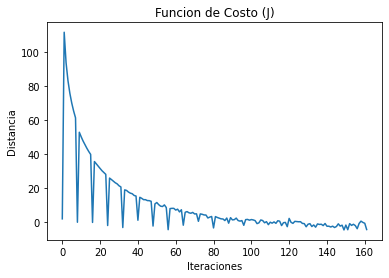

In [15]:
# %%
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=140, method='FP',
                 reduction_ = True)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
p.results()


**SGD**

el tiempo requerido fue:0.8603010177612305sg


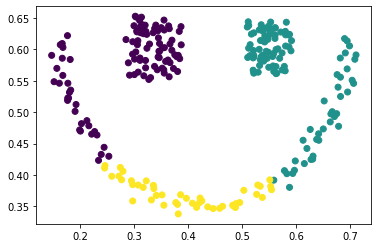

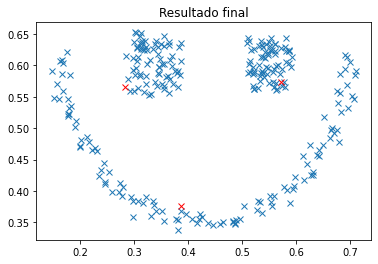

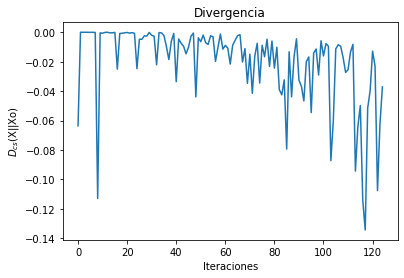

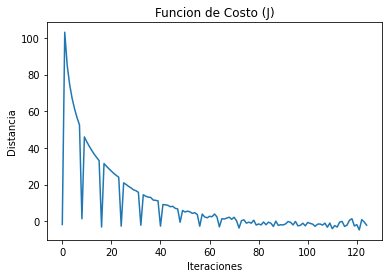

In [18]:
# %%
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=100, method='SGD',
                 reduction_ = True)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
p.results()

**Adam**

el tiempo requerido fue:1.3514404296875sg


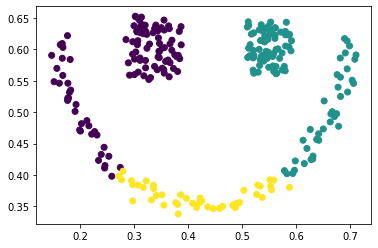

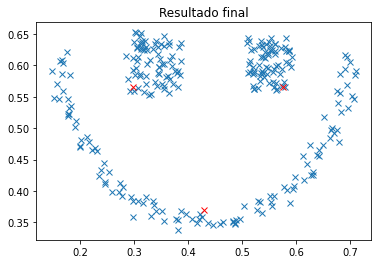

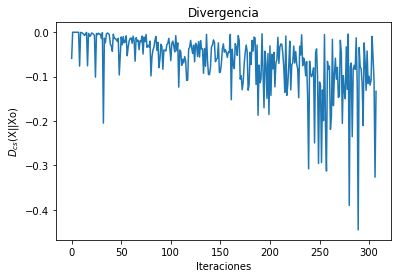

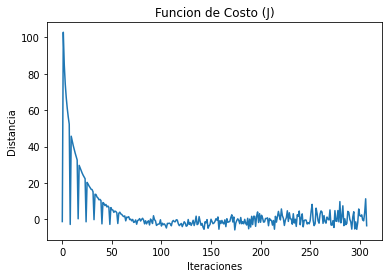

In [20]:
# %%
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=100, method='SGD',optimization='Adam',
                 reduction_ = True)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
p.results()

**Nadam**

el tiempo requerido fue:2.4070076942443848sg


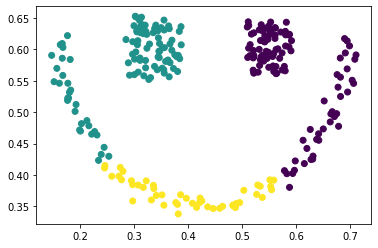

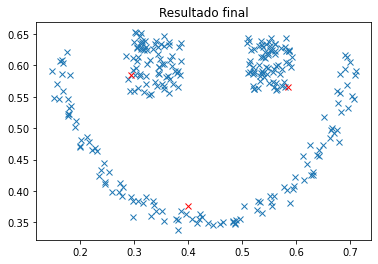

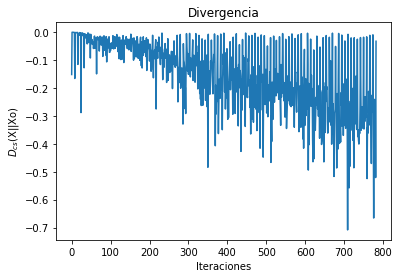

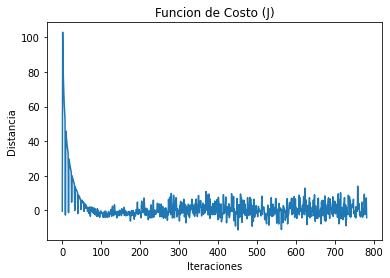

In [22]:
# %%
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=100, method='SGD',optimization='Nadam',
                 reduction_ = True)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
p.results()